In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load Breast Cancer dataset and convert to DataFrame
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Explore the dataset
print(df.head())
print(df.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
from sklearn.model_selection import train_test_split

# Handle missing data (example: filling missing values with the median)
df.fillna(df.median(), inplace=True)

# Split the data into features and labels
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 95.61%


/home/davy/Documents/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")

Decision Tree Accuracy: 92.98%


In [7]:
from sklearn.svm import SVC

# Train SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

SVM Accuracy: 94.74%


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate performance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Logistic Regression - Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Logistic Regression - Precision: 0.96, Recall: 0.96, F1 Score: 0.96


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate performance
precision = precision_score(y_test, y_pred_tree, average='weighted')
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')

print(f"Decision tree - Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Decision tree - Precision: 0.93, Recall: 0.93, F1 Score: 0.93


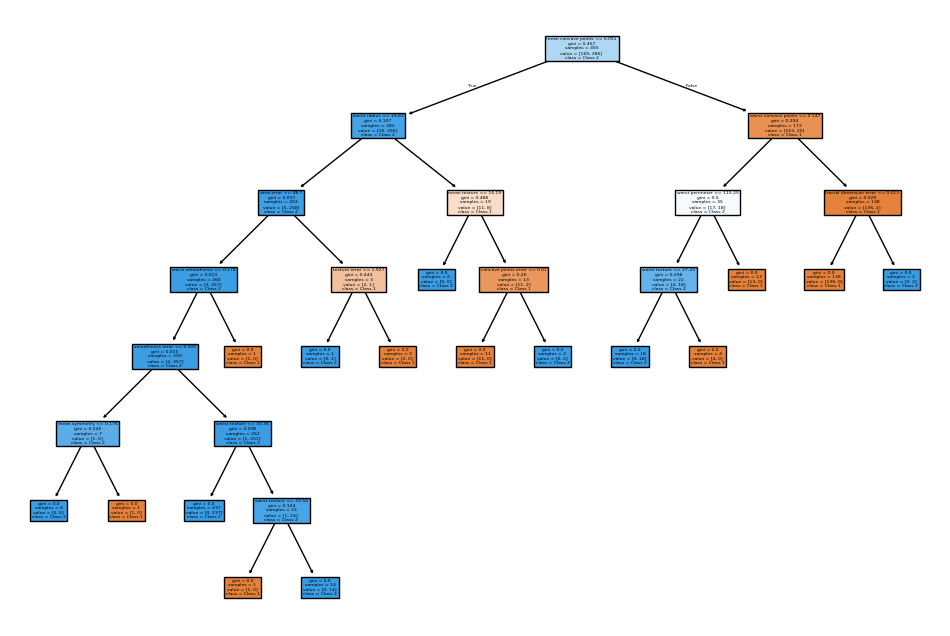

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Class 1', 'Class 2'])
plt.show()

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate performance
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM - Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

SVM - Precision: 0.95, Recall: 0.95, F1 Score: 0.95
